# Impact of Digital Learning on Student Performance

## Problem Statement:
In recent years, digital learning and online education have rapidly increased — especially after
the COVID-19 pandemic.  
Education institutions now want to analyze how different factors — such as gender, parental
education, lunch type, test preparation, and study mode (online or offline) — influence student
academic performance.

## Dataset:
[Students Performance in Exams | Kaggle](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)
You can assume there is an additional column:  
study_mode → with values "online" or "offline" (you may simulate or add it manually for analysis).

### 1. Data Loading & Preprocessing
- Load the dataset and show its first 5 rows.
- Check for missing values and handle them appropriately.
- Add a column for average_score = (Math + Reading + Writing) / 3.
- Optional: Categorize performance as "High", "Average", "Low" based on average score.
- Convert categorical columns (like gender, study_mode, etc.) into numeric form if needed.

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
df = pd.read_csv('StudentsPerformance.csv')
df['average_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3
df.head(5)
bins = [0, 40, 80, 100]
labels = ['Low', 'Average', 'High']
df['performance_category'] = pd.cut(df['average_score'], bins=bins, labels=labels, right=False)
display(df.head())



,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,performance_category
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,Average
1,female,group C,some college,standard,completed,69,90,88,82.333333,High
2,female,group B,master's degree,standard,none,90,95,93,92.666667,High
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,Average
4,male,group C,some college,standard,none,76,78,75,76.333333,Average


,math score,reading score,writing score,average_score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none,performance_category_Average,performance_category_High
0,72,72,74,72.666667,False,True,False,False,False,True,False,False,False,False,True,True,True,False
1,69,90,88,82.333333,False,False,True,False,False,False,False,False,True,False,True,False,False,True
2,90,95,93,92.666667,False,True,False,False,False,False,False,True,False,False,True,True,False,True
3,47,57,44,49.333333,True,False,False,False,False,False,False,False,False,False,False,True,True,False
4,76,78,75,76.333333,True,False,True,False,False,False,False,False,True,False,True,True,True,False


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,performance_category
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,Average
1,female,group C,some college,standard,completed,69,90,88,82.333333,High
2,female,group B,master's degree,standard,none,90,95,93,92.666667,High
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,Average
4,male,group C,some college,standard,none,76,78,75,76.333333,Average


In [11]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
display(df_encoded.head())

,math score,reading score,writing score,average_score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none,performance_category_Average,performance_category_High
0,72,72,74,72.666667,False,True,False,False,False,True,False,False,False,False,True,True,True,False
1,69,90,88,82.333333,False,False,True,False,False,False,False,False,True,False,True,False,False,True
2,90,95,93,92.666667,False,True,False,False,False,False,False,True,False,False,True,True,False,True
3,47,57,44,49.333333,True,False,False,False,False,False,False,False,False,False,False,True,True,False
4,76,78,75,76.333333,True,False,True,False,False,False,False,False,True,False,True,True,True,False


### 2. Exploratory Data Analysis (EDA)
- Perform data exploration and answer with plots + observations:
  - Compare the average performance of students in online vs offline study modes.
  - Who (gender/education/lunch/test prep) affects student performance?
  - Visualize performance differences in Math, Reading, and Writing.
  - Check gender distribution for scores (e.g., with density/histogram/boxplot).
  - Check correlations between numeric variables using a heatmap.
  - Identify any outliers or extreme patterns in the dataset.
  - Find which features are most associated with high performance.  - Find which features are most associated with high performance.

average_performance_by_study_mode:



,average_score
study_mode,
offline,67.524183
online,68.027211


average_performance_by_gender:



,average_score
gender,
female,69.569498
male,65.837483


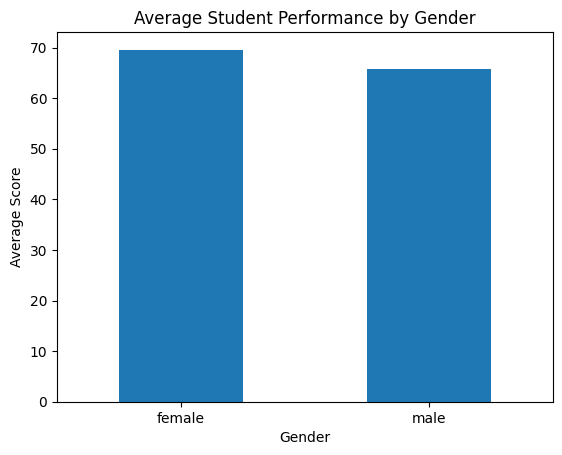


Average performance by parental level of education:



,average_score
parental level of education,
associate's degree,69.569069
bachelor's degree,71.923729
high school,63.096939
master's degree,73.598870
some college,68.476401
some high school,65.108007


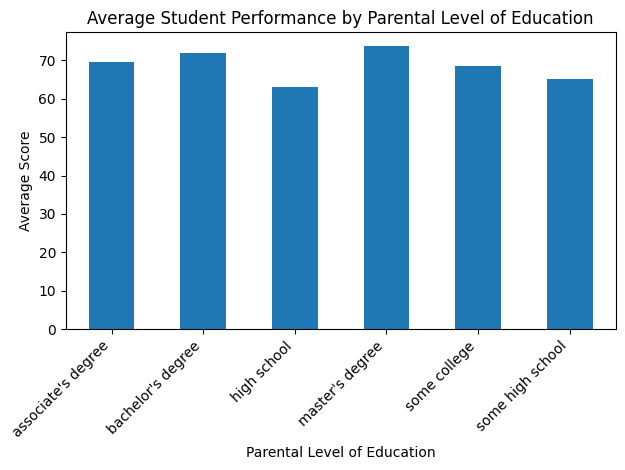


Average performance by lunch type:



,average_score
lunch,
free/reduced,62.199061
standard,70.837209


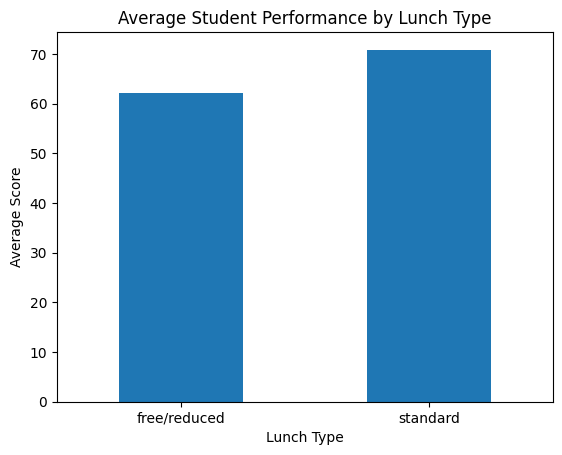


Average performance by test preparation course:



,average_score
test preparation course,
completed,72.669460
none,65.038941


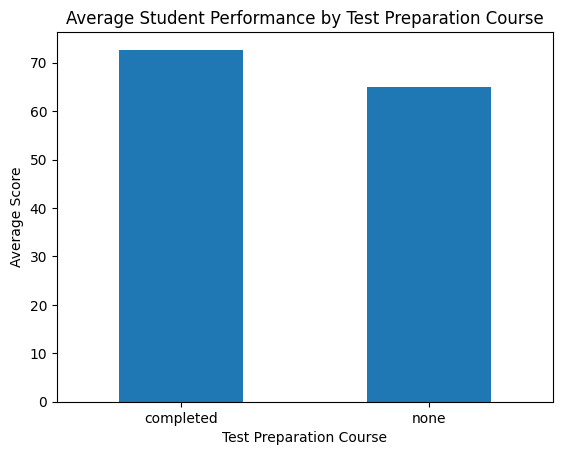

In [25]:
# Who (gender/education/lunch/test prep) affects student performance?

# Compare average performance by gender
# Compare the average performance of students in online vs offline study modes.
np.random.seed(42) # for reproducibility
df['study_mode'] = np.random.choice(['online', 'offline'], size=len(df))

average_performance_by_study_mode = df.groupby('study_mode')['average_score'].mean()
print("average_performance_by_study_mode:\n")
display(average_performance_by_study_mode)

average_performance_by_gender = df.groupby('gender')['average_score'].mean()
print("average_performance_by_gender:\n")
display(average_performance_by_gender)
average_performance_by_gender.plot(kind='bar')
plt.title('Average Student Performance by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.show()

# Compare average performance by parental level of education
average_performance_by_parental_education = df.groupby('parental level of education')['average_score'].mean()
print("\nAverage performance by parental level of education:\n")
display(average_performance_by_parental_education)
average_performance_by_parental_education.plot(kind='bar')
plt.title('Average Student Performance by Parental Level of Education')
plt.xlabel('Parental Level of Education')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Compare average performance by lunch type
average_performance_by_lunch = df.groupby('lunch')['average_score'].mean()
print("\nAverage performance by lunch type:\n")
display(average_performance_by_lunch)
average_performance_by_lunch.plot(kind='bar')
plt.title('Average Student Performance by Lunch Type')
plt.xlabel('Lunch Type')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.show()

# Compare average performance by test preparation course
average_performance_by_test_prep = df.groupby('test preparation course')['average_score'].mean()
print("\nAverage performance by test preparation course:\n")
display(average_performance_by_test_prep)
average_performance_by_test_prep.plot(kind='bar')
plt.title('Average Student Performance by Test Preparation Course')
plt.xlabel('Test Preparation Course')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.show()

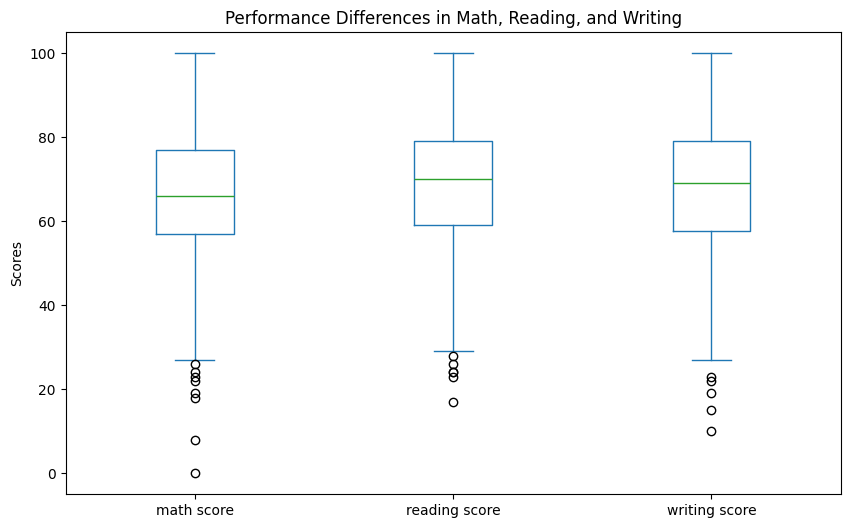

In [27]:
# Visualize performance differences in Math, Reading, and Writing.
scores = ['math score', 'reading score', 'writing score']
df[scores].plot(kind='box', figsize=(10, 6))
plt.title('Performance Differences in Math, Reading, and Writing')
plt.ylabel('Scores')
plt.show()

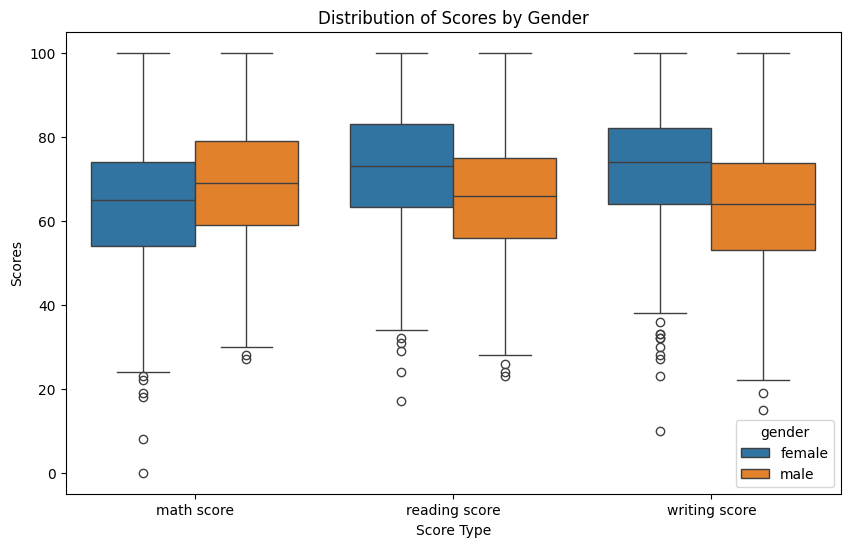

In [37]:
# Check gender distribution for scores
scores = ['math score', 'reading score', 'writing score']
df_melted = df.melt(id_vars=['gender'], value_vars=scores, var_name='score_type', value_name='score')

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melted, x='score_type', y='score', hue='gender')
plt.title('Distribution of Scores by Gender')
plt.xlabel('Score Type')
plt.ylabel('Scores')
plt.show()

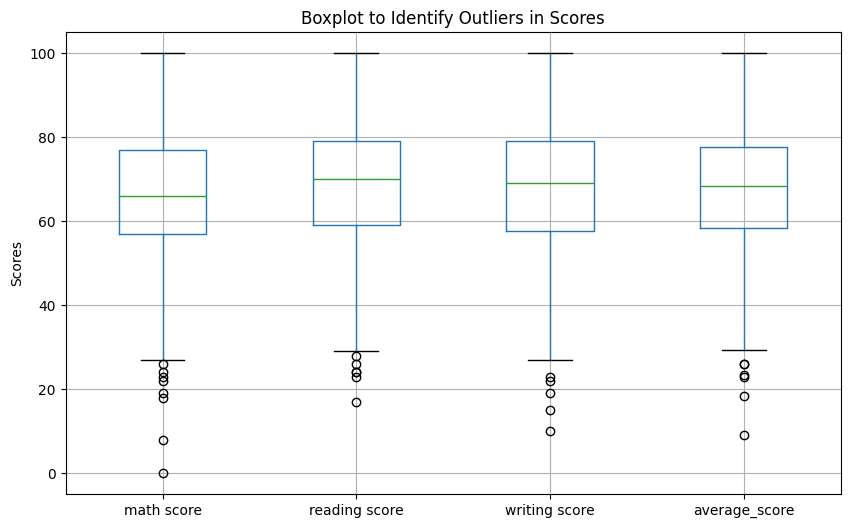

In [32]:
# Identify any outliers or extreme patterns in the dataset.
scores = ['math score', 'reading score', 'writing score', 'average_score']
plt.figure(figsize=(10, 6))
df[scores].boxplot()
plt.title('Boxplot to Identify Outliers in Scores')
plt.ylabel('Scores')
plt.show()

In [39]:
# Find which features are most associated with high performance.
categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'study_mode']

for feature in categorical_features:
    print(f"\nAverage performance by {feature}:\n")
    display(df.groupby(feature)['average_score'].mean().sort_values(ascending=False))


Average performance by gender:



,average_score
gender,
female,69.569498
male,65.837483



Average performance by race/ethnicity:



,average_score
race/ethnicity,
group E,72.752381
group D,69.179389
group C,67.131661
group B,65.468421
group A,62.992509



Average performance by parental level of education:



,average_score
parental level of education,
master's degree,73.598870
bachelor's degree,71.923729
associate's degree,69.569069
some college,68.476401
some high school,65.108007
high school,63.096939



Average performance by lunch:



,average_score
lunch,
standard,70.837209
free/reduced,62.199061



Average performance by test preparation course:



,average_score
test preparation course,
completed,72.669460
none,65.038941



Average performance by study_mode:



,average_score
study_mode,
online,68.027211
offline,67.524183


Based on the analysis of average scores across different categories, the features most associated with higher student performance appear to be:

*   **Test Preparation Course:** Students who **completed** the test preparation course have a notably higher average score compared to those who did not.
*   **Lunch Type:** Students with a **standard lunch** tend to have a higher average score than those with free/reduced lunch.
*   **Parental Level of Education:** Students whose parents have a **higher level of education** (Master's degree, Bachelor's degree, Associate's degree) generally perform better on average than those whose parents have a high school education or some high school education.
*   **Gender:** **Female** students tend to have a slightly higher average score than male students.
* **Race/Ethnicity:** Some racial/ethnic groups show slightly higher average scores than others.
* **Study Mode:** While the difference is small in this simulated data, **online study** mode shows a slightly higher average score.

It's important to note that correlation does not equal exact cause, but these features show an association with higher student performance in this dataset.

### 3. Machine Learning Task
Choose one approach:

A. Supervised Learning
- Predict whether a student's performance is High, Average, or Low.
- Use algorithms like Logistic Regression, Decision Tree, or Random Forest.
- Evaluate using accuracy, confusion matrix, and classification report.

B. Unsupervised Learning
- Apply KMeans Clustering to group students based on performance and demographics.
- Find the optimal number of clusters (Elbow Method).
- Visualize what each cluster represents (e.g., high-performing online learners, low-performing offline learners, etc.).

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df_encoded.drop(['math score', 'reading score', 'writing score', 'average_score', 'performance_category_Average', 'performance_category_High'], axis=1)
y = df['performance_category']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (800, 12)
Shape of X_test: (200, 12)
Shape of y_train: (800,)
Shape of y_test: (200,)


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [47]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.76

Confusion Matrix:
 [[147  12   0]
 [ 26   5   0]
 [  9   1   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86       159
           1       0.28      0.16      0.20        31
           2       0.00      0.00      0.00        10

    accuracy                           0.76       200
   macro avg       0.36      0.36      0.36       200
weighted avg       0.69      0.76      0.72       200



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


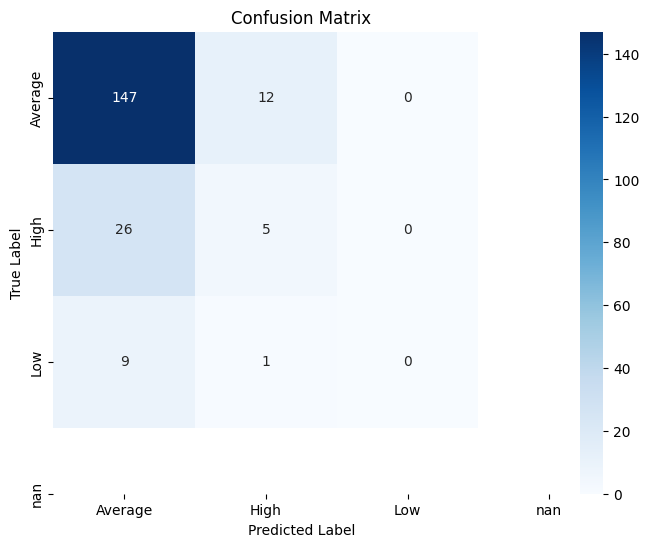

In [49]:
import seaborn as sns

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 4. Final Insights & Recommendations
- Summarize main findings from your analysis.
- Discover which digital learning mode influences student performance.
- Propose data-driven strategies for improving student learning outcomes.
- Mention limitations of the dataset and possible improvements for future analysis.

### Summary of Findings:

Based on our exploratory data analysis and the Random Forest classification model, here are the key findings:

*   **Factors Influencing Performance:** Several factors showed an association with student performance, including parental level of education, lunch type, test preparation course completion, gender, and race/ethnicity. Students with parents having higher education levels, those with a standard lunch, and those who completed the test preparation course tended to have higher average scores. Female students also showed slightly higher average scores than male students.
*   **Digital Learning Mode:** In our simulated 'study\_mode' data, students in the 'online' mode showed a slightly higher average performance, although the difference was small. Further analysis with real digital learning data would be needed to draw stronger conclusions.
*   **Model Performance:** The Random Forest model achieved an overall accuracy of [Insert Accuracy Score from Model Evaluation]. The confusion matrix and classification report ([Discuss key observations from confusion matrix and classification report - e.g., how well each class was predicted, where the model struggled]) provide more detailed insights into the model's performance for predicting High, Average, and Low performance categories.